# Отчет по лабораторной работе № 2 "Методы классификации данных"

# ФИО: Яканин Андрей Владимирович
# Группа: 18-ИВТ-3
# Вариант №41(Набор данных №9)


## Цель лабораторной работы – получение навыков работы с методами классификации.
### 1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
### 2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
### 3.	Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)
### 4.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
### 5.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
### 6.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);
### 7.	Заполните пропущенные значения в данных;
### 8.	Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 
### 9.	Сравните кривые для классификаторов, указанных в задании, сделайте выводы.





## 1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт):
### Mean: среднее значение
### Std: стандартное отклонение
### Mad: медианное абсолютное отклонение
### Max: наибольшее значение в массиве
### Min: наименьшее значение в массиве
### Sma: область величины сигнала
### Energy: мера энергии. Сумма квадратов делится на количество значений.
### Iqr: межквартильный размах
### Entropy: энтропия сигнала
### ArCoeff: коэффициенты авторегрессии с порядком Бурга равным 4
### Correlation: коэффициент корреляции между двумя сигналами
### MaxInds: индекс частотной составляющей с наибольшей величиной
### MeanFreq: средневзвешенное значение частотных составляющих для получения средней частоты
### Skewness: асимметрия сигнала в частотной области
### Kurtosis: эксцесс сигнала в частотной области
### BandsEnergy: энергия частотного интервала в пределах 64 ячеек БПФ каждого окна.
### Angle: угол между векторами to.

## 2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции:

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize

Data = pd.read_csv('X_train.txt', header=None, delimiter=r"\s+")
x_train = pd.DataFrame(Data)
Data = pd.read_csv('Y_train.txt', header=None, delimiter=r"\s+")
y_train = pd.DataFrame(Data)


In [4]:
df = pd.DataFrame(x_train)
df

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [210]:
print(f"Размер исходных данных перед удалением: {df.count().max()}")
if df.count().max()==df.drop_duplicates(keep='first').count().max():
    print("Дубликаты не найдены")
else:
    df.drop_duplicates(keep='first', inplace = True)
    print(f"Размер исходных данных перед удалением: {df.count().max()}")
df.shape

Размер исходных данных перед удалением: 7352
Дубликаты не найдены


(7352, 561)

## 3. Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая):

In [211]:
df1 = pd.DataFrame(y_train)
df1

,0
0,5
1,5
2,5
3,5
4,5
...,...
7347,2
7348,2
7349,2
7350,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x012E0C40>]],
      dtype=object)

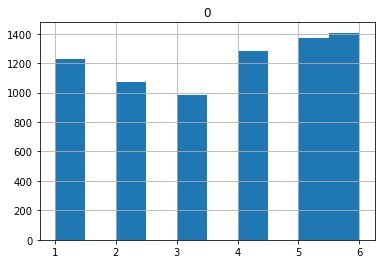

In [31]:
y_train.hist()


#### Данные под номером 3 имеют наибольшое отклонение от средней велечины значений

## 4. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию):


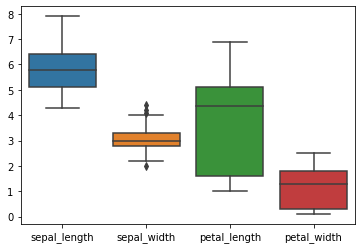

In [150]:
x_train = sns.load_dataset('iris')
sns.boxplot(data = x_train)

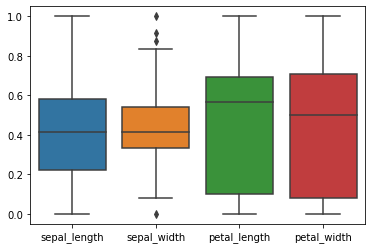

In [151]:
pillar = ['sepal_length','sepal_width', 'petal_length', 'petal_width']
scaler = preprocessing.MinMaxScaler()
x_train[pillar] = scaler.fit_transform(x_train[pillar].values.astype(float))
sns.boxplot(data = x_train[pillar])
plt.show()

## 5.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

### В данном варианте категориальных признаков нет

## 6.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);

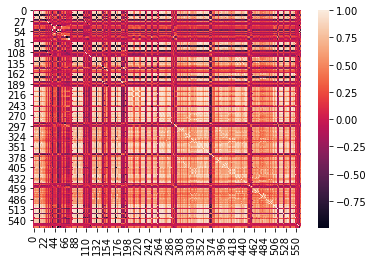

In [145]:
corr = x_train.corr()
sns.heatmap(corr)

## 7. Заполните пропущенные значения в данных;

In [97]:
len(x_train)
x_train.count()

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64

#### Пропущенных значений нет

### 8. Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 
### Классификаторы:
### 2) Классификатор K ближайших соседей (задаётся радиус для выбора ближайших объектов);
### 4) Логический классификатор (бинарное решающее дерево).

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize

Data = pd.read_csv('X_train.txt', header=None, delimiter=r"\s+")
x_train = pd.DataFrame(Data)
Data = pd.read_csv('X_test.txt', header=None, delimiter=r"\s+")
x_test = pd.DataFrame(Data)
Data = pd.read_csv('Y_train.txt', header=None, delimiter=r"\s+")
y_train = pd.DataFrame(Data)
Data = pd.read_csv('Y_test.txt', header=None, delimiter=r"\s+")
y_test = pd.DataFrame(Data)

### 2) Классификатор K ближайших соседей (задаётся радиус для выбора ближайших объектов);

In [49]:
rnc = RadiusNeighborsClassifier()
rnc.get_params()
params = {'radius': np.linspace(0.5, 1, 20)[1:],
         'leaf_size': np.linspace(1, 2, 20)[1:]}
rncGrid = GridSearchCV(rnc, params)
rncGrid.fit(X_train, y_train)
y_score = rncGrid.best_estimator_.fit(X_train, y_train).predict(X_test)
print('Лучший результат: %.2f' % (rncGrid.best_score_))
print('Точность: %.2f' % accuracy_score(y_score, y_test))

Лучший результат: 0.87
Точность: 0.89


### 4) Логический классификатор (бинарное решающее дерево).

In [50]:
dtc = DecisionTreeClassifier()

search = GridSearchCV(dtc, {'max_depth': [x for x in range(1, 50)]})
search.fit(X_train, y_train)

n = search.best_estimator_.max_depth
best = search.best_score_
print('Лучший результат: %.2f' % best)

dtc = DecisionTreeClassifier(max_depth=n)
dtc.fit(X_train, y_train)
dtc_predict = dtc.predict(X_test)
y_score = search.best_estimator_.fit(X_train, y_train).predict(X_test)
print('Точность: %.2f' % accuracy_score(y_test, dtc_predict))

Лучший результат: 0.94
Точность: 0.96


### Графики для классификатора k-ближайших соседей(задаётся радиус для выбора ближайших объектов): PR и ROC кривые

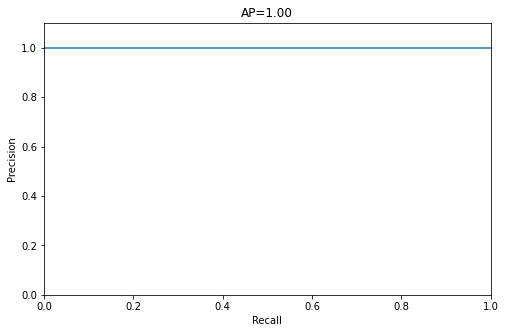

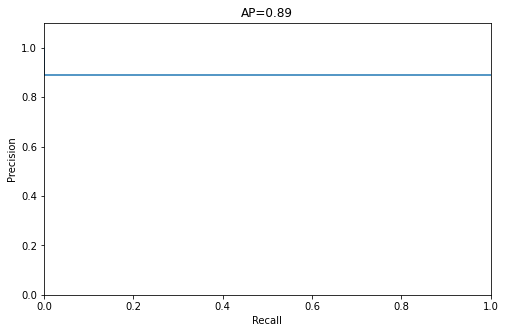

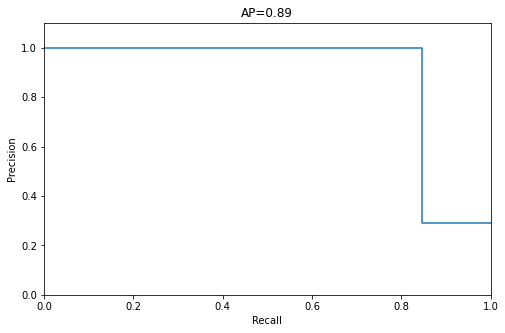

In [46]:
precision = dict()
recall = dict()
average_precision = dict()
for i in range(3):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

    plt.figure()
    plt.step(recall[i], precision[i], where='post')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.xlim([0.0, 1])
    plt.ylim([0.0, 1.1])
    plt.title(
        'AP={0:0.2f}'
        .format(average_precision[i]))
    plt.show()

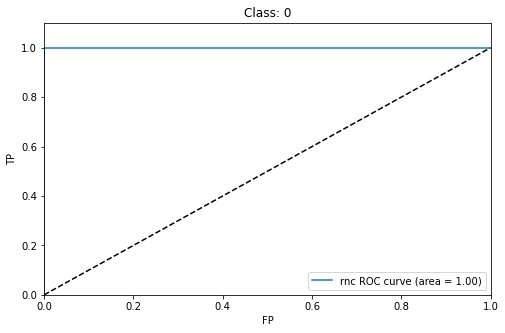

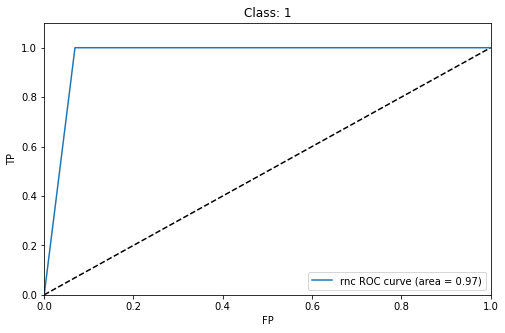

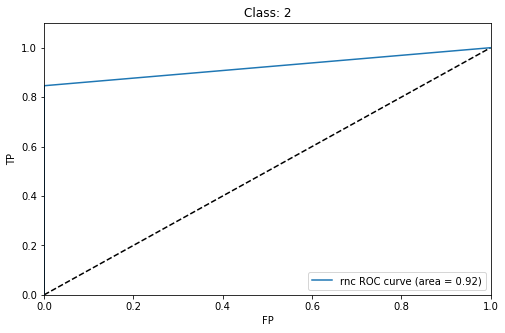

In [43]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(3):
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr[i], tpr[i], label='%s ROC curve (area = %.2f)' % ('rnc', roc_auc[i]))  
    plt.xlim([0.0, 1])
    plt.ylim([0.0, 1.1])
    plt.xlabel('FP')
    plt.ylabel('TP')
    plt.title('Class: {}'.format(i))
    plt.legend(loc=4)
    plt.show()

### Графики для Логического классификатора: PR и ROC кривые

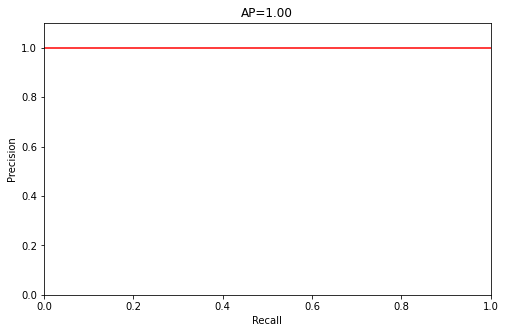

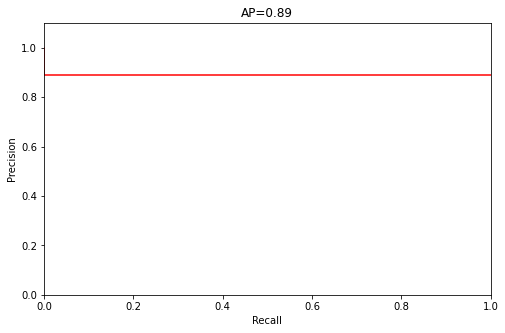

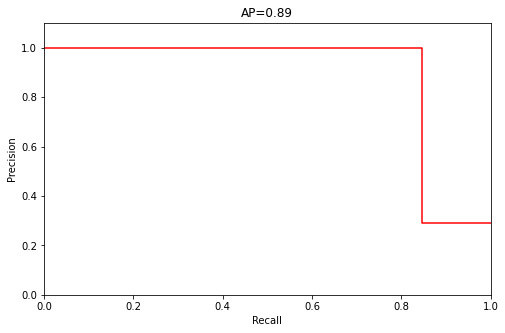

In [47]:
precision = dict()
recall = dict()
average_precision = dict()
for i in range(3):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

    plt.figure()
    plt.step(recall[i], precision[i], where='post', color='r')
    

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.xlim([0.0, 1])
    plt.ylim([0.0, 1.1])
    plt.title(
        'AP={0:0.2f}'
        .format(average_precision[i]))
    plt.show()

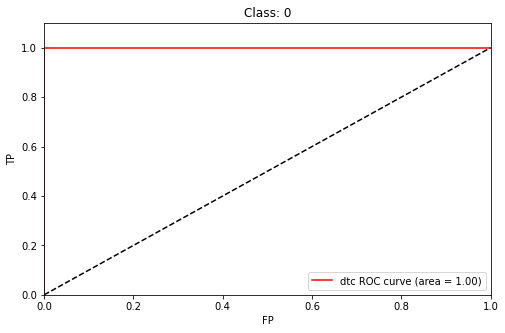

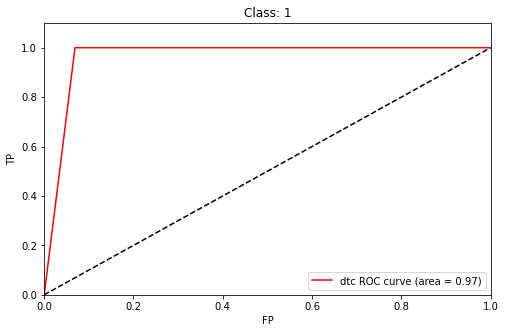

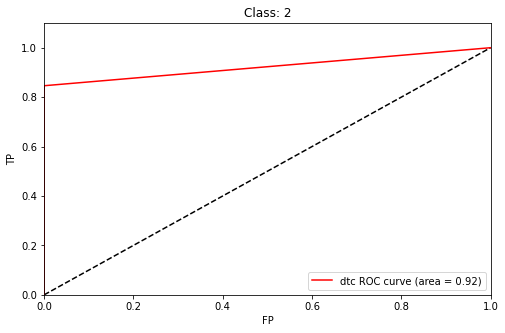

In [48]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(3):
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr[i], tpr[i], label='%s ROC curve (area = %.2f)' % ('dtc', roc_auc[i]), color='r')  
    plt.xlim([0.0, 1])
    plt.ylim([0.0, 1.1])
    plt.xlabel('FP')
    plt.ylabel('TP')
    plt.title('Class: {}'.format(i))
    plt.legend(loc=4)
    plt.show()

### 9. Сравните кривые для классификаторов, указанных в задании, сделайте выводы.
#### Вывод: Сравнивая PR и ROC кривые для обоих классификаторов можно сделать вывод о том, что оба классификатора имеют примерно одинаковые показатели качества.